In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz 

df = pd.read_csv('global1_logistics_data.csv', parse_dates=['Date'])

df.head()
df.info()
df.describe()

print("Number of missing values per column")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1853 non-null   object 
 1   Global_Container_Index_FBX  1856 non-null   float64
 2   China_US_West_Coast_Route   1854 non-null   float64
 3   US_West_Coast_China_Route   1853 non-null   float64
 4   China_North_Europe_Route    1850 non-null   float64
 5   North_Europe_China_Route    1847 non-null   float64
 6   Brent_Oil_Price_USD         1844 non-null   float64
 7   GSCPI_Index                 1844 non-null   float64
 8   Year                        1841 non-null   float64
 9   Month                       1837 non-null   float64
 10  Day_Of_Week                 1833 non-null   float64
dtypes: float64(10), object(1)
memory usage: 160.0+ KB
Number of missing values per column
Date                           7
Global_Container_Index_FBX  

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv('global1_logistics_data.csv', parse_dates=['Date'])

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

numeric_cols = ['Global_Container_Index_FBX', 'China_US_West_Coast_Route',
                'US_West_Coast_China_Route', 'China_North_Europe_Route',
                'North_Europe_China_Route', 'Brent_Oil_Price_USD', 'GSCPI_Index']

df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

df['YearMonth'] = df['Date'].dt.to_period('M')

monthly_df = df.groupby('YearMonth')[numeric_cols].mean().reset_index()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(monthly_df[numeric_cols])

scaled_cols = [f"{col}_scaled" for col in numeric_cols]
monthly_df[scaled_cols] = X_scaled

cleaned_file_path = "global1_logistics_monthly_cleaned.csv"
monthly_df.to_csv(cleaned_file_path, index=False)

print(f"{cleaned_file_path}")
monthly_df.head()


✅ Cleaned monthly dataset saved to: global1_logistics_monthly_cleaned.csv


,YearMonth,Global_Container_Index_FBX,China_US_West_Coast_Route,US_West_Coast_China_Route,China_North_Europe_Route,North_Europe_China_Route,Brent_Oil_Price_USD,GSCPI_Index,Global_Container_Index_FBX_scaled,China_US_West_Coast_Route_scaled,US_West_Coast_China_Route_scaled,China_North_Europe_Route_scaled,North_Europe_China_Route_scaled,Brent_Oil_Price_USD_scaled,GSCPI_Index_scaled
0,2020-01,1396.55871,1515.677419,452.0,1966.870968,474.000000,64.447983,1.23000,0.004133,0.013982,0.0,0.013243,0.000000,0.402475,0.436207
1,2020-02,1386.67000,1494.000000,452.0,1965.000000,474.000000,55.779655,1.21000,0.002984,0.012022,0.0,0.012836,0.000000,0.304526,0.432759
2,2020-03,1386.67000,1494.000000,452.0,1965.000000,474.000000,33.986129,1.18000,0.002984,0.012022,0.0,0.012836,0.000000,0.058267,0.427586
3,2020-04,1386.67000,1494.000000,452.0,1906.033333,501.237465,28.829583,1.22686,0.002984,0.012022,0.0,0.000000,0.026547,0.000000,0.435666
4,2020-05,1545.00000,1675.000000,452.0,1965.000000,474.000000,32.133000,0.70000,0.021388,0.028383,0.0,0.012836,0.000000,0.037327,0.344828


In [4]:
df = pd.read_csv('global1_logistics_monthly_cleaned.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YearMonth                          53 non-null     object 
 1   Global_Container_Index_FBX         53 non-null     float64
 2   China_US_West_Coast_Route          53 non-null     float64
 3   US_West_Coast_China_Route          53 non-null     float64
 4   China_North_Europe_Route           53 non-null     float64
 5   North_Europe_China_Route           53 non-null     float64
 6   Brent_Oil_Price_USD                53 non-null     float64
 7   GSCPI_Index                        53 non-null     float64
 8   Global_Container_Index_FBX_scaled  53 non-null     float64
 9   China_US_West_Coast_Route_scaled   53 non-null     float64
 10  US_West_Coast_China_Route_scaled   53 non-null     float64
 11  China_North_Europe_Route_scaled    53 non-null     float64
 

,Global_Container_Index_FBX,China_US_West_Coast_Route,US_West_Coast_China_Route,China_North_Europe_Route,North_Europe_China_Route,Brent_Oil_Price_USD,GSCPI_Index,Global_Container_Index_FBX_scaled,China_US_West_Coast_Route_scaled,US_West_Coast_China_Route_scaled,China_North_Europe_Route_scaled,North_Europe_China_Route_scaled,Brent_Oil_Price_USD_scaled,GSCPI_Index_scaled
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,4234.909430,4629.320618,504.115960,5463.110170,1267.285454,74.759141,0.947877,0.334059,0.295428,0.766411,0.774293,0.773183,0.518987,0.387565
std,3276.873033,3651.177794,28.577904,1913.794815,432.058503,21.299661,1.535780,0.380899,0.330035,0.420263,0.416589,0.421110,0.240678,0.264790
min,1361.000000,1361.000000,452.000000,1906.033333,474.000000,28.829583,-1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1477.000000,1515.677419,511.271186,6469.999302,1493.262063,64.447983,-0.200000,0.013484,0.013982,0.871635,0.993470,0.993433,0.402475,0.189655
50%,2346.000000,3078.000000,520.000000,6500.000000,1500.000000,79.241532,0.556961,0.114495,0.155202,1.000000,1.000000,1.000000,0.569637,0.320166
75%,7600.000000,7498.000000,520.000000,6500.000000,1500.000000,85.221290,2.300000,0.725212,0.554732,1.000000,1.000000,1.000000,0.637206,0.620690
max,9964.000000,12424.000000,520.000000,6500.000000,1500.000000,117.328000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Fuzzy Partition Coefficient (FPC): 0.9559 (higher = better separation)


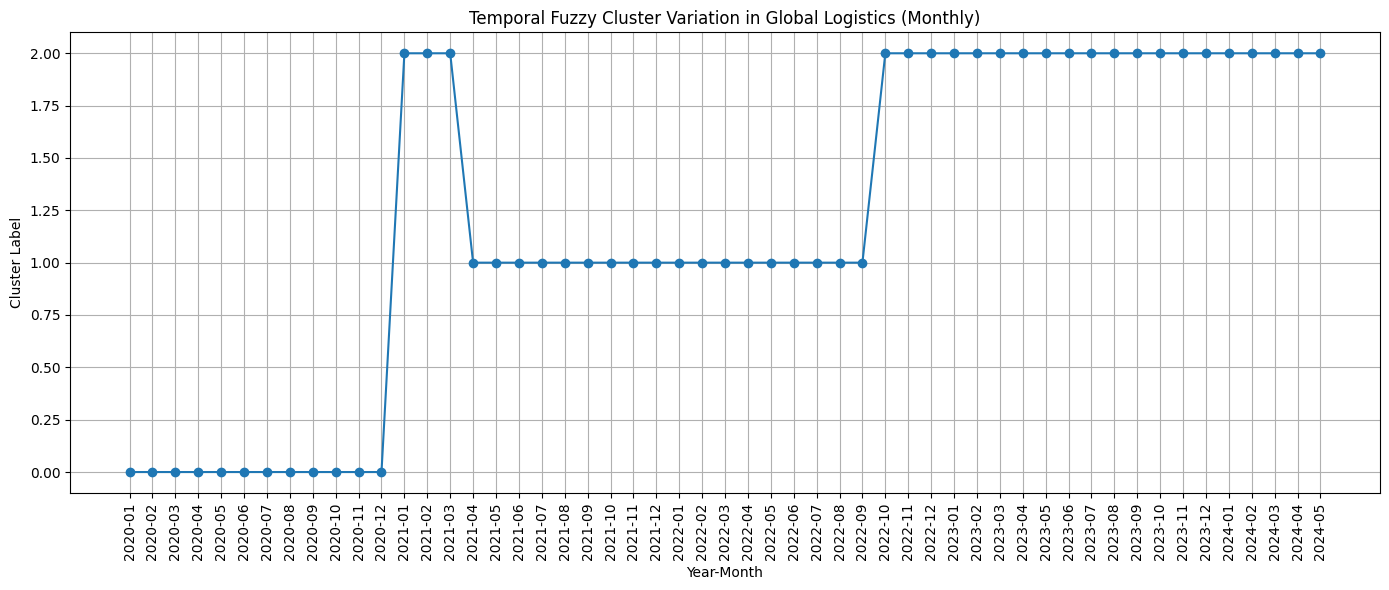

         Global_Container_Index_FBX  China_US_West_Coast_Route  \
Cluster                                                          
0                       1920.211371                2386.231183   
1                       8442.407407                9197.437305   
2                       2149.753478                2224.580307   

         US_West_Coast_China_Route  China_North_Europe_Route  \
Cluster                                                        
0                       452.000000               1960.242025   
1                       518.583029               6495.891875   
2                       519.984841               6482.429607   

         North_Europe_China_Route  Brent_Oil_Price_USD  GSCPI_Index  
Cluster                                                              
0                      476.269789            43.517689     0.567818  
1                     1498.703015            88.153053     2.642568  
2                     1498.879883            80.576837    -0.180111 

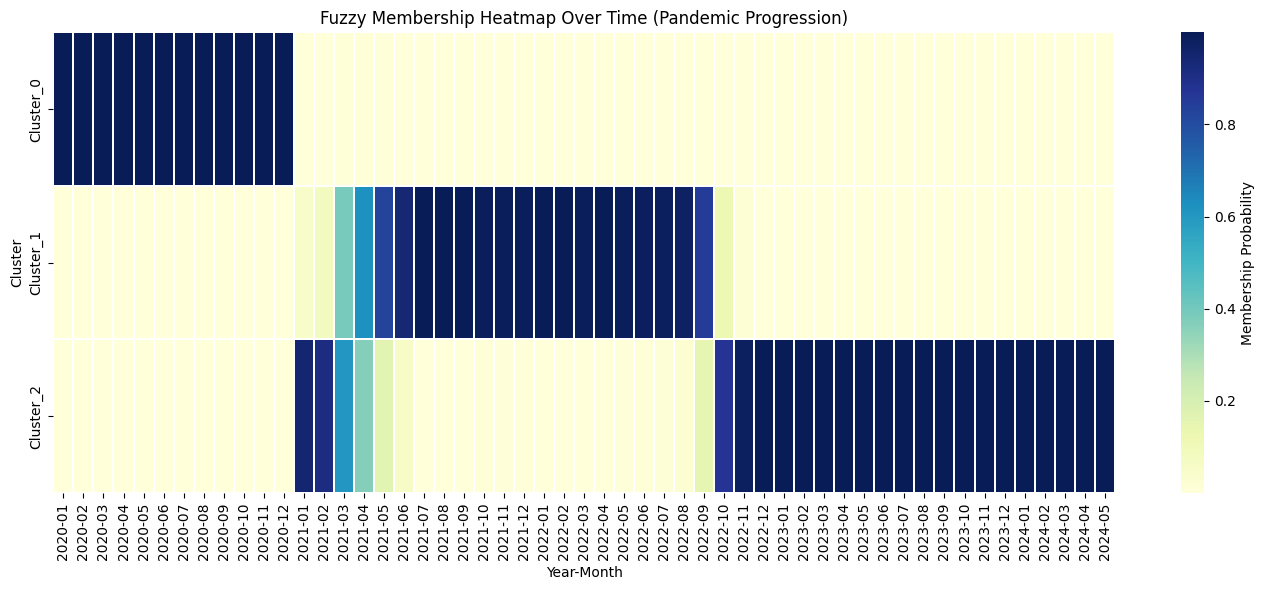

In [10]:
import skfuzzy as fuzz

data = monthly_df[scaled_cols].values.T  

n_clusters = 3

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=1.5, error=0.005, maxiter=1000, init=None
)

print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f} (higher = better separation)")

monthly_df['Cluster'] = np.argmax(u, axis=0)
monthly_df['Max_Membership'] = np.max(u, axis=0)

plt.figure(figsize=(14, 6))
plt.plot(monthly_df['YearMonth'].astype(str), monthly_df['Cluster'], marker='o', linestyle='-')
plt.title("Temporal Fuzzy Cluster Variation in Global Logistics (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cluster_profiles = monthly_df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)

import seaborn as sns

membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df['YearMonth'] = monthly_df['YearMonth'].astype(str)

plt.figure(figsize=(14, 6))
sns.heatmap(
    membership_df.set_index('YearMonth').T,
    cmap="YlGnBu", cbar_kws={'label': 'Membership Probability'},
    linewidths=0.3
)
plt.title("Fuzzy Membership Heatmap Over Time (Pandemic Progression)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Clusters: 3, Fuzziness (m): 2, FPC: 0.8711
Clusters: 4, Fuzziness (m): 2, FPC: 0.8205
Clusters: 5, Fuzziness (m): 2, FPC: 0.7623
Clusters: 6, Fuzziness (m): 2, FPC: 0.7773
Clusters: 7, Fuzziness (m): 2, FPC: 0.7628
Clusters: 3, Fuzziness (m): 1.9, FPC: 0.8914
Clusters: 4, Fuzziness (m): 1.9, FPC: 0.8471
Clusters: 5, Fuzziness (m): 1.9, FPC: 0.7932
Clusters: 6, Fuzziness (m): 1.9, FPC: 0.7771
Clusters: 7, Fuzziness (m): 1.9, FPC: 0.7281
Clusters: 3, Fuzziness (m): 1.8, FPC: 0.9102
Clusters: 4, Fuzziness (m): 1.8, FPC: 0.8720
Clusters: 5, Fuzziness (m): 1.8, FPC: 0.8557
Clusters: 6, Fuzziness (m): 1.8, FPC: 0.8492
Clusters: 7, Fuzziness (m): 1.8, FPC: 0.8501
Clusters: 3, Fuzziness (m): 1.7, FPC: 0.9273
Clusters: 4, Fuzziness (m): 1.7, FPC: 0.8951
Clusters: 5, Fuzziness (m): 1.7, FPC: 0.8826
Clusters: 6, Fuzziness (m): 1.7, FPC: 0.8643
Clusters: 7, Fuzziness (m): 1.7, FPC: 0.8611
Clusters: 3, Fuzziness (m): 1.6, FPC: 0.9426
Clusters: 4, Fuzziness (m): 1.6, FPC: 0.9166
Clusters: 5, Fuzzine

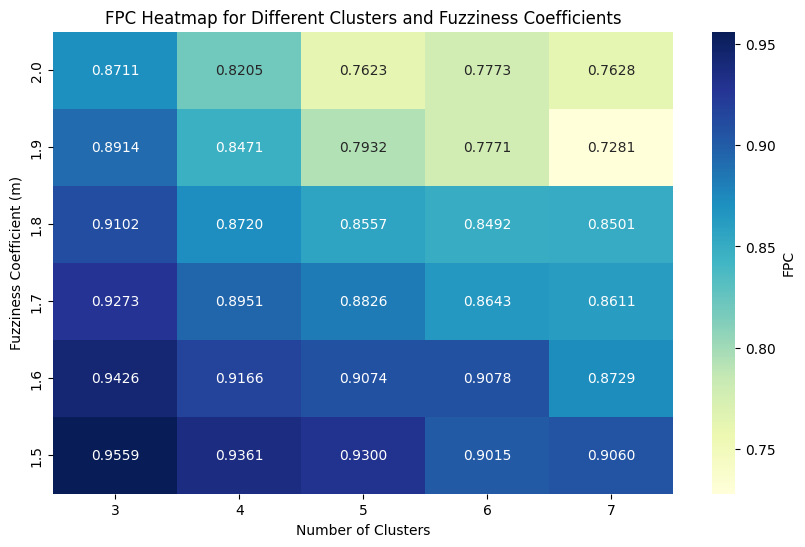

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz

data = monthly_df[scaled_cols].values.T  
m_values = [2, 1.9, 1.8, 1.7, 1.6, 1.5]
cluster_counts = [3, 4, 5, 6, 7]

results = []

for m in m_values:
    for c in cluster_counts:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            data=data,
            c=c,
            m=m,
            error=0.005,
            maxiter=1000,
            init=None
        )
        print(f"Clusters: {c}, Fuzziness (m): {m}, FPC: {fpc:.4f}")
        results.append({'Clusters': c, 'Fuzziness': m, 'FPC': fpc})

results_df = pd.DataFrame(results)

heatmap_data = results_df.pivot(index='Fuzziness', columns='Clusters', values='FPC')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='YlGnBu', cbar_kws={'label': 'FPC'})
plt.title('FPC Heatmap for Different Clusters and Fuzziness Coefficients')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzziness Coefficient (m)')
plt.gca().invert_yaxis()  
plt.show()


Fuzzy Partition Coefficient (FPC): 0.8206 (higher = better separation)


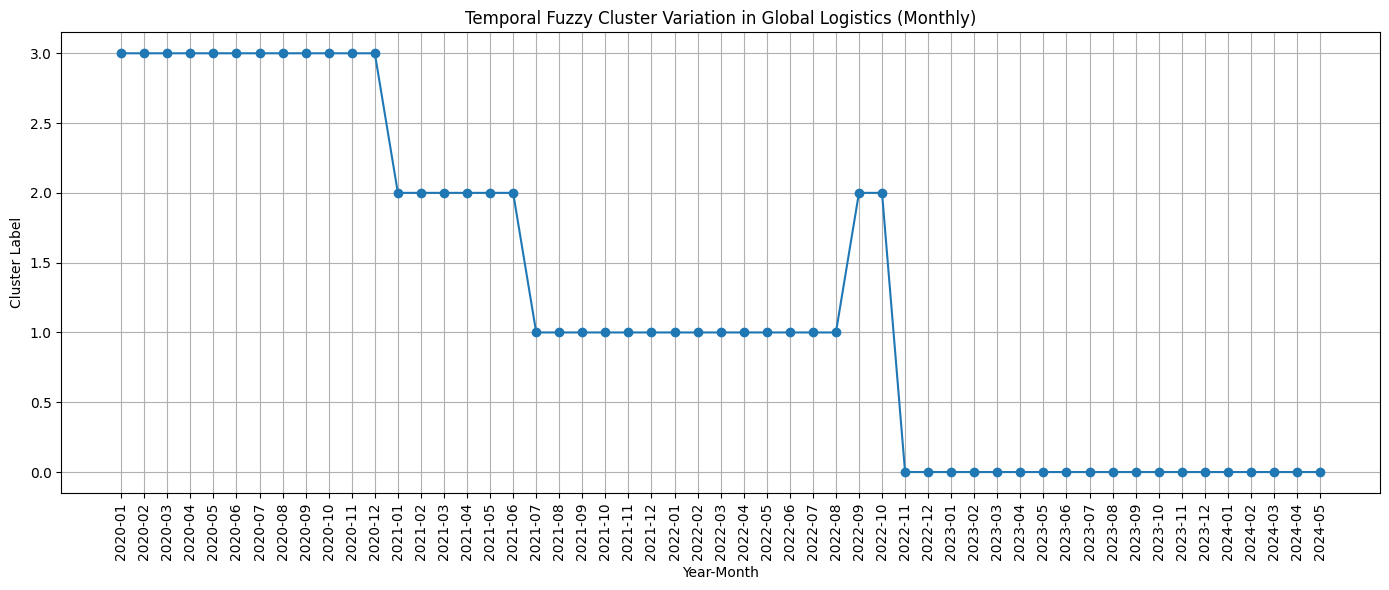

         Global_Container_Index_FBX  China_US_West_Coast_Route  \
Cluster                                                          
0                       1750.578947                1752.860372   
1                       9196.452381               10129.490820   
2                       4924.541250                5200.250000   
3                       1920.211371                2386.231183   

         US_West_Coast_China_Route  China_North_Europe_Route  \
Cluster                                                        
0                       519.981649               6478.730577   
1                       518.801667               6495.844059   
2                       518.908898               6498.029615   
3                       452.000000               1960.242025   

         North_Europe_China_Route  Brent_Oil_Price_USD  GSCPI_Index  
Cluster                                                              
0                     1498.644068            82.958852    -0.518029  
1       

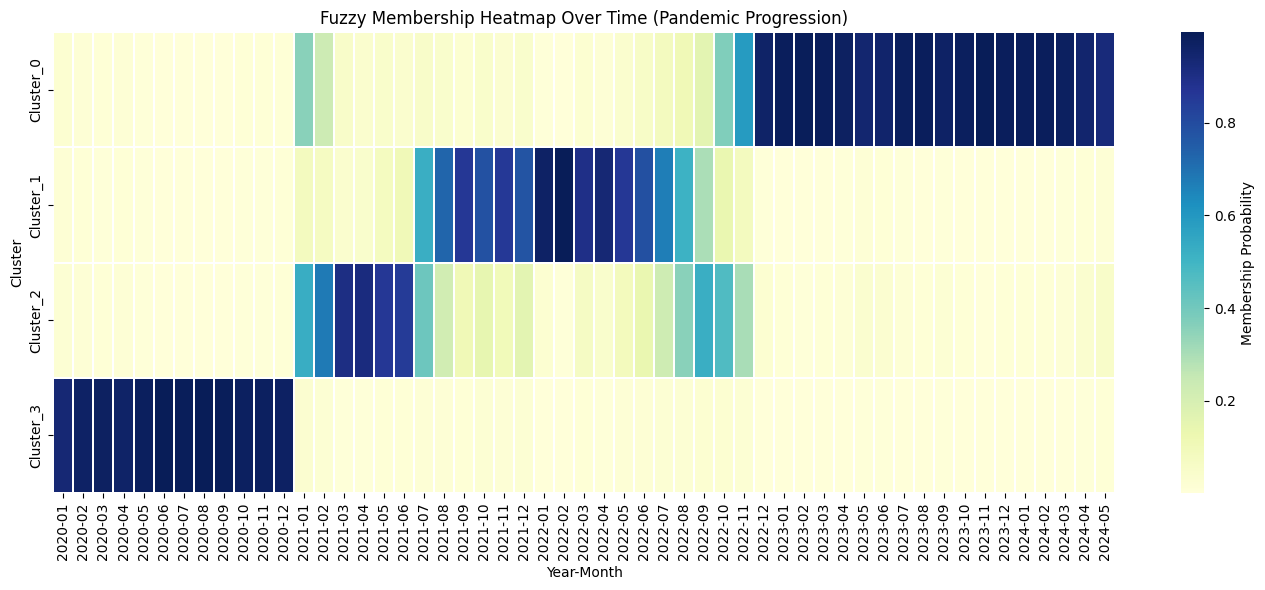

In [7]:
import skfuzzy as fuzz

data = monthly_df[scaled_cols].values.T 

n_clusters = 4

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f} (higher = better separation)")

monthly_df['Cluster'] = np.argmax(u, axis=0)
monthly_df['Max_Membership'] = np.max(u, axis=0)

plt.figure(figsize=(14, 6))
plt.plot(monthly_df['YearMonth'].astype(str), monthly_df['Cluster'], marker='o', linestyle='-')
plt.title("Temporal Fuzzy Cluster Variation in Global Logistics (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cluster_profiles = monthly_df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)


import seaborn as sns

membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df['YearMonth'] = monthly_df['YearMonth'].astype(str)

plt.figure(figsize=(14, 6))
sns.heatmap(
    membership_df.set_index('YearMonth').T,
    cmap="YlGnBu", cbar_kws={'label': 'Membership Probability'},
    linewidths=0.3
)
plt.title("Fuzzy Membership Heatmap Over Time (Pandemic Progression)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Fuzzy Partition Coefficient (FPC): 0.7623 (higher = better separation)


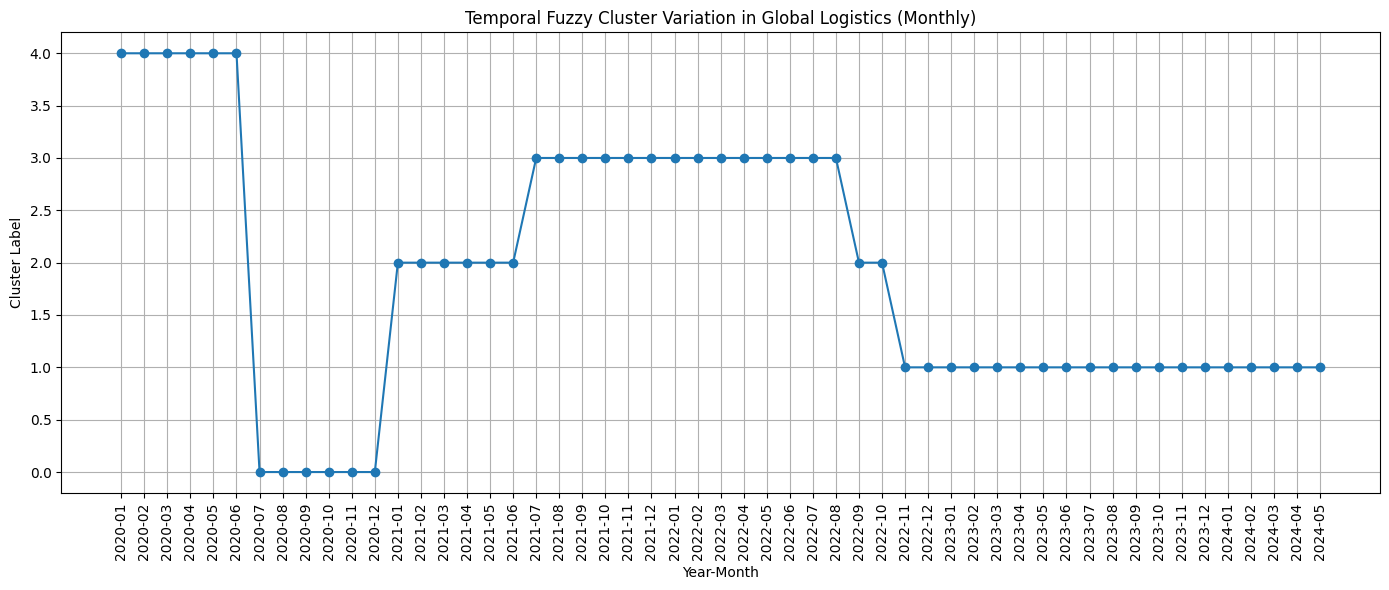

         Global_Container_Index_FBX  China_US_West_Coast_Route  \
Cluster                                                          
0                       2399.327957                3214.516129   
1                       1750.578947                1752.860372   
2                       4924.541250                5200.250000   
3                       9196.452381               10129.490820   
4                       1441.094785                1557.946237   

         US_West_Coast_China_Route  China_North_Europe_Route  \
Cluster                                                        
0                       452.000000               1965.000000   
1                       519.981649               6478.730577   
2                       518.908898               6498.029615   
3                       518.801667               6495.844059   
4                       452.000000               1955.484050   

         North_Europe_China_Route  Brent_Oil_Price_USD  GSCPI_Index  
Cluster           

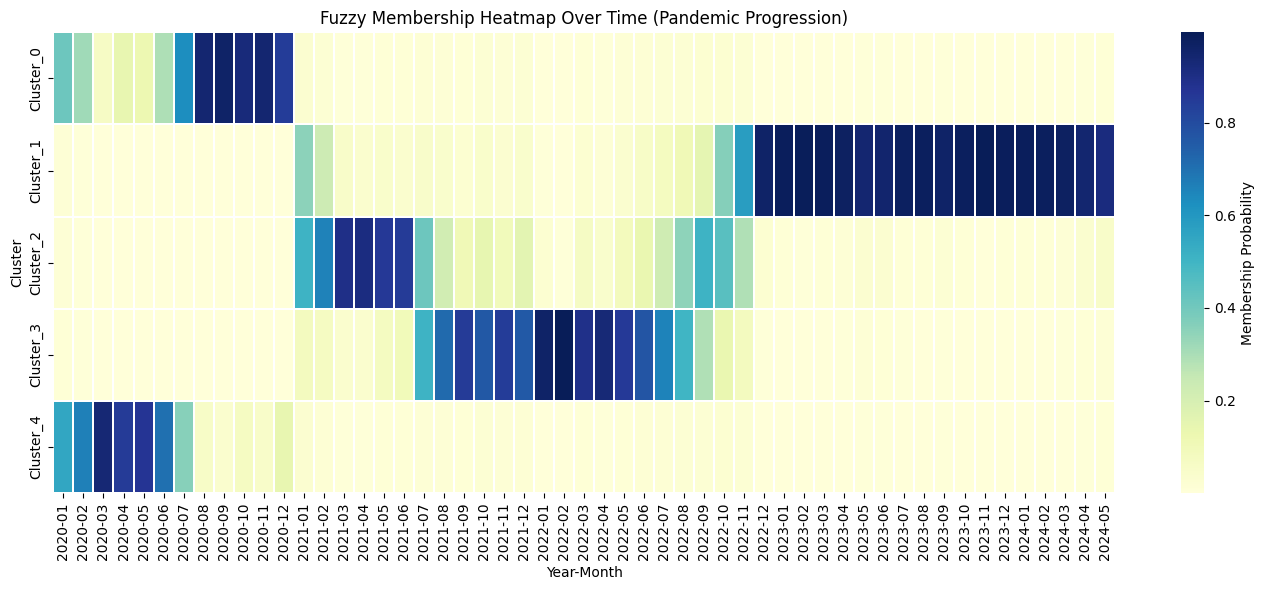

In [8]:
import skfuzzy as fuzz

data = monthly_df[scaled_cols].values.T 

n_clusters = 5

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f} (higher = better separation)")

monthly_df['Cluster'] = np.argmax(u, axis=0)
monthly_df['Max_Membership'] = np.max(u, axis=0)

plt.figure(figsize=(14, 6))
plt.plot(monthly_df['YearMonth'].astype(str), monthly_df['Cluster'], marker='o', linestyle='-')
plt.title("Temporal Fuzzy Cluster Variation in Global Logistics (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cluster_profiles = monthly_df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)

import seaborn as sns

membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df['YearMonth'] = monthly_df['YearMonth'].astype(str)

plt.figure(figsize=(14, 6))
sns.heatmap(
    membership_df.set_index('YearMonth').T,
    cmap="YlGnBu", cbar_kws={'label': 'Membership Probability'},
    linewidths=0.3
)
plt.title("Fuzzy Membership Heatmap Over Time (Pandemic Progression)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Fuzzy Partition Coefficient (FPC): 0.7773 (higher = better separation)


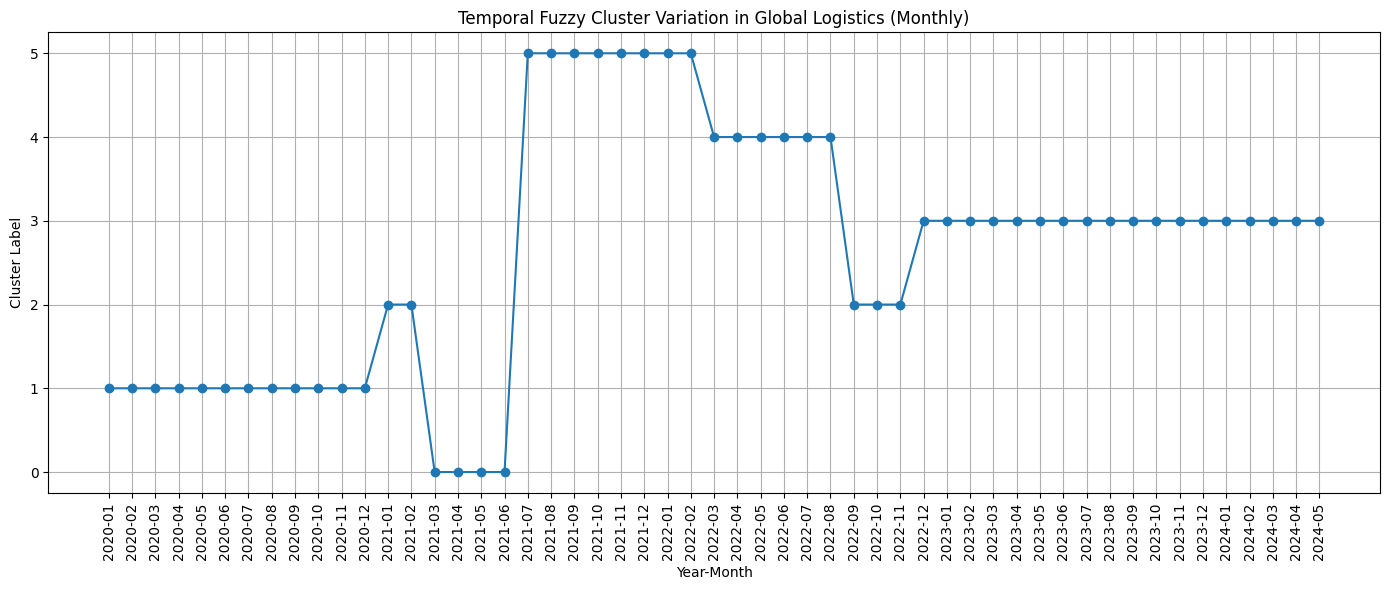

         Global_Container_Index_FBX  China_US_West_Coast_Route  \
Cluster                                                          
0                       5182.250000                5414.500000   
1                       1920.211371                2386.231183   
2                       4525.266000                4780.600000   
3                       1627.888889                1630.297059   
4                       9139.166667                9466.166667   
5                       9239.416667               10626.983935   

         US_West_Coast_China_Route  China_North_Europe_Route  \
Cluster                                                        
0                       517.817797               6496.059230   
1                       452.000000               1960.242025   
2                       520.000000               6500.000000   
3                       519.980630               6477.548942   
4                       520.000000               6500.000000   
5                      

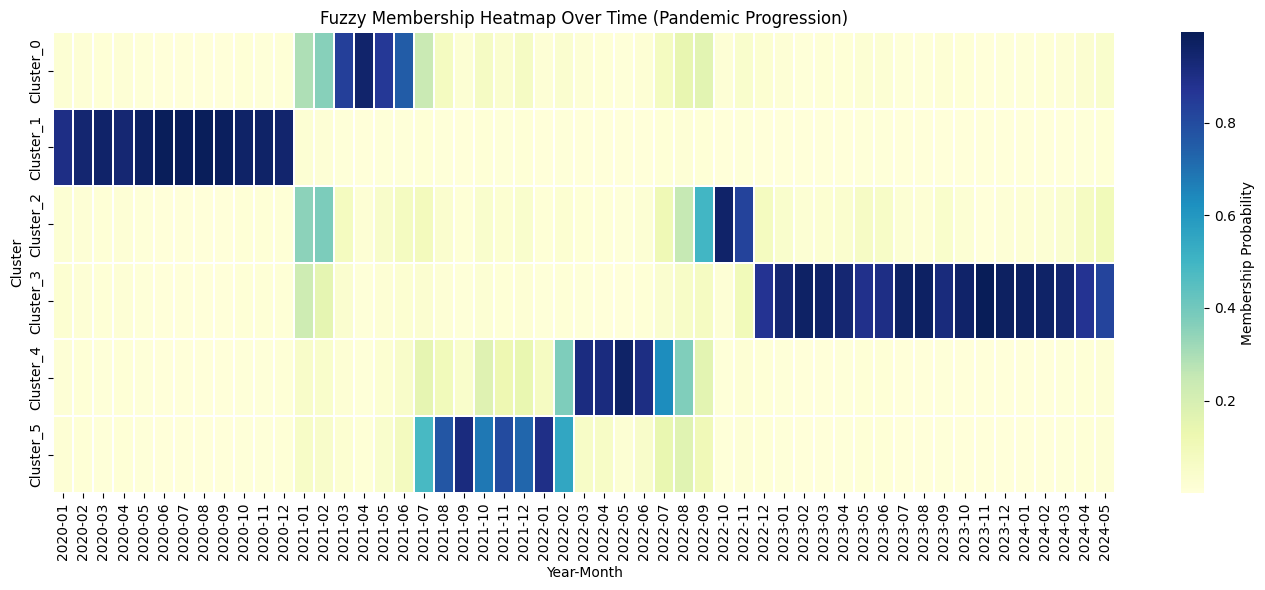

In [9]:
import skfuzzy as fuzz

data = monthly_df[scaled_cols].values.T 

n_clusters = 6

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f} (higher = better separation)")

monthly_df['Cluster'] = np.argmax(u, axis=0)
monthly_df['Max_Membership'] = np.max(u, axis=0)

plt.figure(figsize=(14, 6))
plt.plot(monthly_df['YearMonth'].astype(str), monthly_df['Cluster'], marker='o', linestyle='-')
plt.title("Temporal Fuzzy Cluster Variation in Global Logistics (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cluster_profiles = monthly_df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)

import seaborn as sns

membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df['YearMonth'] = monthly_df['YearMonth'].astype(str)

plt.figure(figsize=(14, 6))
sns.heatmap(
    membership_df.set_index('YearMonth').T,
    cmap="YlGnBu", cbar_kws={'label': 'Membership Probability'},
    linewidths=0.3
)
plt.title("Fuzzy Membership Heatmap Over Time (Pandemic Progression)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Fuzzy Partition Coefficient (FPC): 0.6883 (higher = better separation)


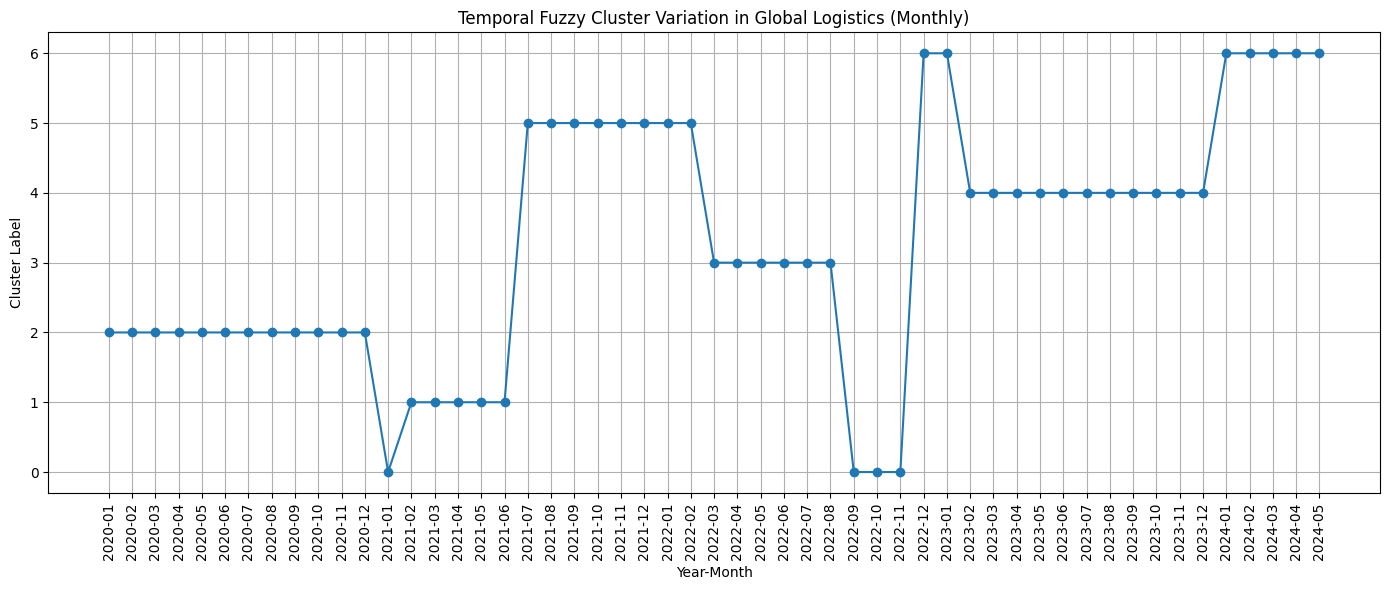

         Global_Container_Index_FBX  China_US_West_Coast_Route  \
Cluster                                                          
0                       4712.332500                4889.250000   
1                       4901.200000                5200.800000   
2                       1920.211371                2386.231183   
3                       9139.166667                9466.166667   
4                       1655.090909                1655.090909   
5                       9239.416667               10626.983935   
6                       1585.142857                1591.335295   

         US_West_Coast_China_Route  China_North_Europe_Route  \
Cluster                                                        
0                       520.000000               6500.000000   
1                       518.254237               6496.847384   
2                       452.000000               1960.242025   
3                       520.000000               6500.000000   
4                    

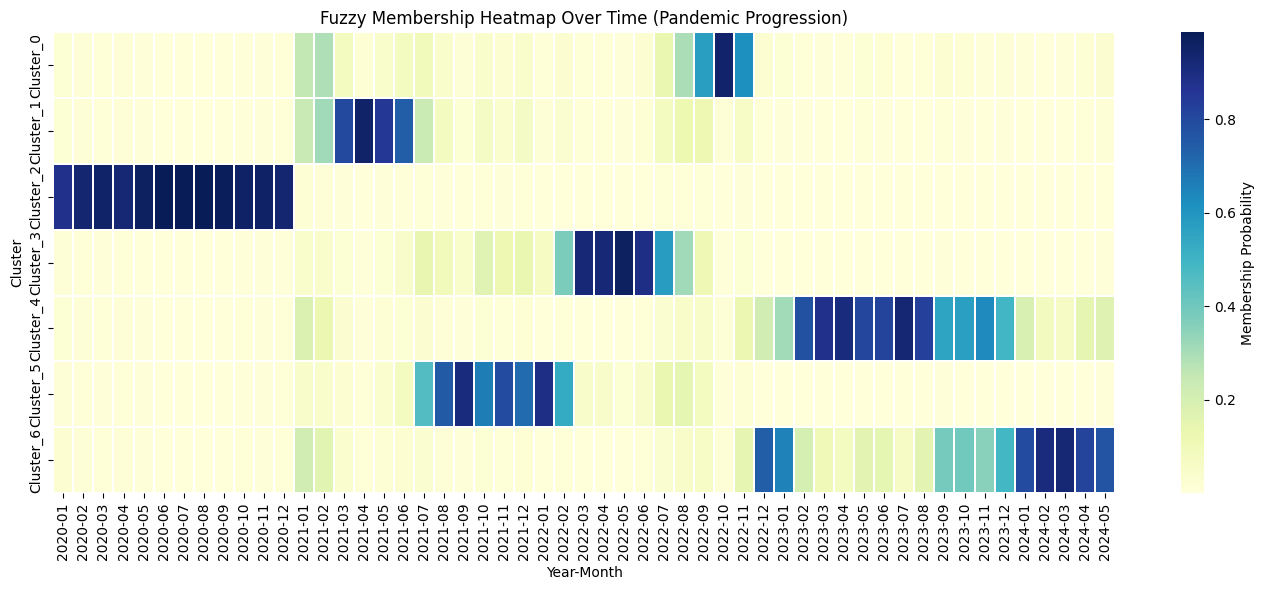

In [10]:
import skfuzzy as fuzz

data = monthly_df[scaled_cols].values.T 
n_clusters = 7

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f} (higher = better separation)")

monthly_df['Cluster'] = np.argmax(u, axis=0)
monthly_df['Max_Membership'] = np.max(u, axis=0)

plt.figure(figsize=(14, 6))
plt.plot(monthly_df['YearMonth'].astype(str), monthly_df['Cluster'], marker='o', linestyle='-')
plt.title("Temporal Fuzzy Cluster Variation in Global Logistics (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cluster_profiles = monthly_df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)

import seaborn as sns

membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df['YearMonth'] = monthly_df['YearMonth'].astype(str)

plt.figure(figsize=(14, 6))
sns.heatmap(
    membership_df.set_index('YearMonth').T,
    cmap="YlGnBu", cbar_kws={'label': 'Membership Probability'},
    linewidths=0.3
)
plt.title("Fuzzy Membership Heatmap Over Time (Pandemic Progression)")
plt.xlabel("Year-Month")
plt.ylabel("Cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
